# Load the data


In [1]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import data

import pandas as pd
import numpy as np

df=pd.read_parquet('data/raw/iV2Ip.parquet', engine='fastparquet')

In [3]:
df.head()

,time[s],serving_cell_rsrp_1,serving_cell_rsrq_1,serving_cell_rssi_1,serving_cell_snr_1,datarate_client,jitter_client,port_local_client,port_remote_client,target_DL,...,twist_linear_x,twist_linear_y,twist_linear_z,twist_angular_x,twist_angular_y,twist_angular_z,distance_to_bs,obstacles_sum,line_of_sight,bag_file
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-12-14 13:30:49+01:00,1.639485e+09,-121.0,-13.0,-86.0,9.0,7620000.0,0.002451,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2021-12-14 13:30:50+01:00,1.639485e+09,-120.4,-13.0,-86.2,9.0,7380000.0,0.001974,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2021-12-14 13:30:51+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,7320000.0,0.001735,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2021-12-14 13:30:52+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,6580000.0,0.001478,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2021-12-14 13:30:53+01:00,1.639485e+09,-120.6,-13.8,-86.4,9.0,6550000.0,0.001616,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [4]:


# Basic info

print(f"\n1. Shape: {df.shape}")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")

print(f"\n2. Column names (first 20):")
print(df.columns.tolist()[:20])

print(f"\n3. Data types:")
print(df.dtypes.value_counts())

print(f"\n4. Missing values:")
print(f"   Total missing: {df.isnull().sum().sum():,}")
print(f"   Percentage: {df.isnull().sum().sum() / df.size * 100:.2f}%")

print(f"\n5. Columns with missing values:")
missing_cols = df.columns[df.isnull().any()].tolist()
print(f"   Count: {len(missing_cols)}")
print(f"   Names: {missing_cols[:10]}...")  # First 10

print(f"\n6. First few rows:")
print(df.head())

print(f"\n7. Timestamp column:")
# You need to identify which column is your timestamp
# Common names: timestamp, time, datetime, date, etc.
time_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"   Possible time columns: {time_cols}")


1. Shape: (53199, 97)
   Rows: 53,199
   Columns: 97

2. Column names (first 20):
['time[s]', 'serving_cell_rsrp_1', 'serving_cell_rsrq_1', 'serving_cell_rssi_1', 'serving_cell_snr_1', 'datarate_client', 'jitter_client', 'port_local_client', 'port_remote_client', 'target_DL', 'throughput_DL', 'jitter_DL', 'device_id_client', 'datarate_server', 'jitter_server', 'port_local_server', 'port_remote_server', 'target_UL', 'throughput_UL', 'jitter_UL']

3. Data types:
float64    96
object      1
Name: count, dtype: int64

4. Missing values:
   Total missing: 1,277,954
   Percentage: 24.77%

5. Columns with missing values:
   Count: 97
   Names: ['time[s]', 'serving_cell_rsrp_1', 'serving_cell_rsrq_1', 'serving_cell_rssi_1', 'serving_cell_snr_1', 'datarate_client', 'jitter_client', 'port_local_client', 'port_remote_client', 'target_DL']...

6. First few rows:
                                time[s]  serving_cell_rsrp_1  \
timestamp                                                      
2021-12-

COLUMNS WITH MISSING VALUES
                               column  missing_count  missing_pct
                         delay_std_UL          34310    64.493693
                        delay_mean_UL          34228    64.339555
                     device_id_server          33539    63.044418
                            jitter_UL          33539    63.044418
                        throughput_UL          33539    63.044418
                            target_UL          33539    63.044418
                         cell_load_UL          33539    63.044418
                         delay_std_DL          30447    57.232279
                        delay_mean_DL          30445    57.228519
                     device_id_client          29851    56.111957
                         cell_load_DL          29851    56.111957
                        throughput_DL          29851    56.111957
                            jitter_DL          29851    56.111957
                            target_DL          2

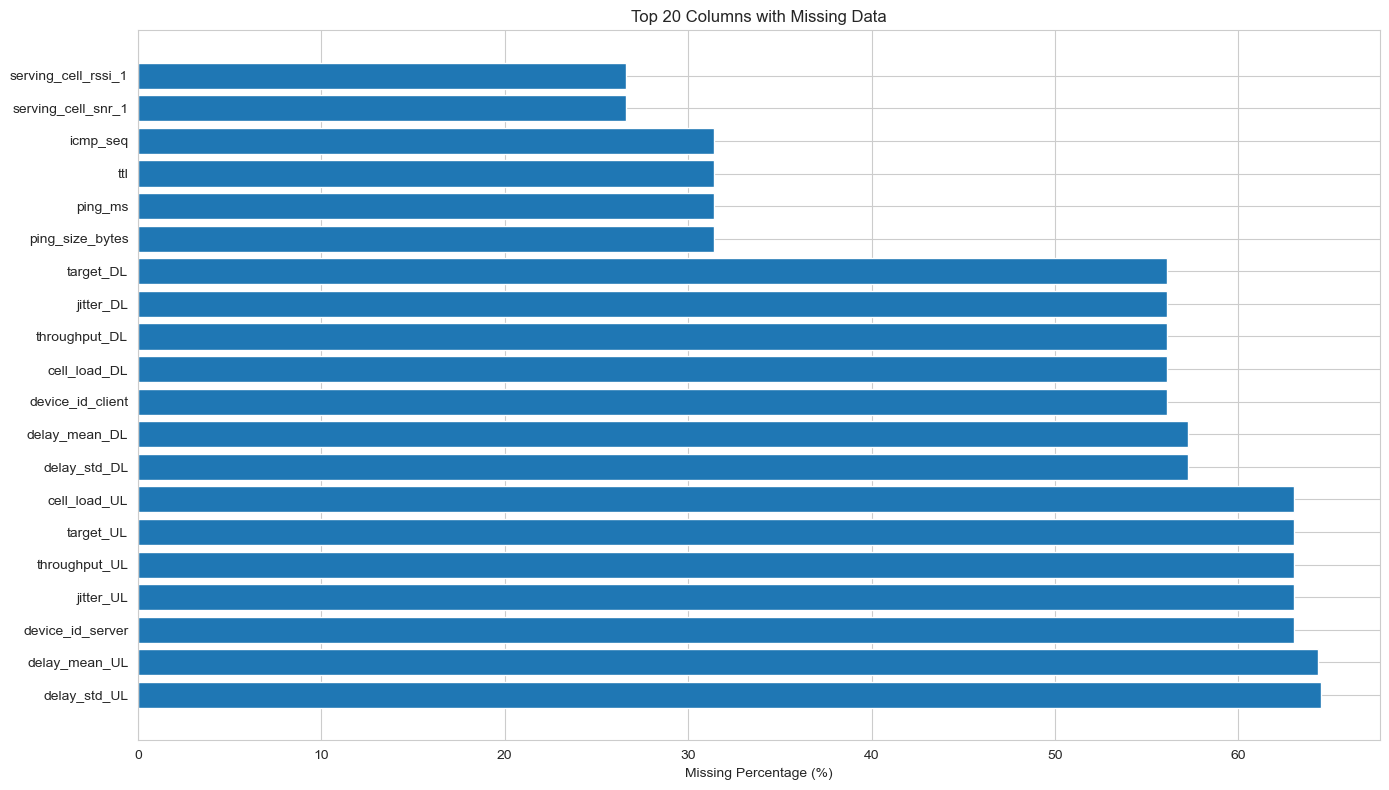


✓ Figure saved to figures/missing_overview.png


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Calculate missing percentages
missing_stats = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_pct': df.isnull().sum() / len(df) * 100,
})

missing_stats = missing_stats[missing_stats['missing_count'] > 0].sort_values('missing_pct', ascending=False)

#print("="*60)
print("COLUMNS WITH MISSING VALUES")
#print("="*60)
print(missing_stats.to_string(index=False))

# Simple visualization
plt.figure(figsize=(14, 8))
if len(missing_stats) > 0:
    plt.barh(missing_stats['column'].head(20), missing_stats['missing_pct'].head(20))
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Data')
    plt.tight_layout()
    plt.show()
    print("\n✓ Figure saved to figures/missing_overview.png")
else:
    print("No missing values found!")

In [6]:
df.reset_index(drop=False, inplace=True)

In [7]:
df

,timestamp,time[s],serving_cell_rsrp_1,serving_cell_rsrq_1,serving_cell_rssi_1,serving_cell_snr_1,datarate_client,jitter_client,port_local_client,port_remote_client,...,twist_linear_x,twist_linear_y,twist_linear_z,twist_angular_x,twist_angular_y,twist_angular_z,distance_to_bs,obstacles_sum,line_of_sight,bag_file
0,2021-12-14 13:30:49+01:00,1.639485e+09,-121.0,-13.0,-86.0,9.0,7620000.0,0.002451,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2021-12-14 13:30:50+01:00,1.639485e+09,-120.4,-13.0,-86.2,9.0,7380000.0,0.001974,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2021-12-14 13:30:51+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,7320000.0,0.001735,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2021-12-14 13:30:52+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,6580000.0,0.001478,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2021-12-14 13:30:53+01:00,1.639485e+09,-120.6,-13.8,-86.4,9.0,6550000.0,0.001616,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53194,2021-12-16 15:07:49+01:00,1.639664e+09,-124.2,-15.2,-88.8,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53195,2021-12-16 15:07:50+01:00,1.639664e+09,-127.0,-16.4,-88.4,6.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53196,2021-12-16 15:07:51+01:00,1.639664e+09,-126.8,-16.2,-88.4,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53197,2021-12-16 15:07:52+01:00,1.639664e+09,-126.2,-16.0,-88.8,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [8]:


# Verify timestamp is now a column
print(df.columns[0])  # Should show 'timestamp'
print(df.shape)  # Should show (53199, 98) now

# Save the corrected version
df.to_csv('data/raw/original_data.csv', index=False)

timestamp
(53199, 98)


In [10]:
"""
Column Taxonomy
Generated from column analysis
Total: 98 columns (including timestamp)
"""

column_taxonomy = {
    'timestamp': [
        'timestamp'
        # Note: 'time[s]' also exists but has 26.6% missing - likely redundant
    ],
    
    'radio_metrics': [
        # Signal quality metrics from serving cell
        'serving_cell_snr_1',      # Signal-to-Noise Ratio
        'serving_cell_rssi_1',     # Received Signal Strength Indicator
        'serving_cell_rsrq_1',     # Reference Signal Received Quality
        'serving_cell_rsrp_1',     # Reference Signal Received Power
        'serving_cell_id',
        'E-ARFCN',                 # Frequency channel
        'Number of Neighbor Cells',
        'Number of Detected Cells',
        'RSRQ(dB)',               # Alternative RSRQ measurement
        'RSRP(dBm)',              # Alternative RSRP measurement
    ],
    
    'network_qos': [
        # Uplink QoS metrics
        'delay_std_UL',            # Delay standard deviation
        'delay_mean_UL',           # Mean delay
        'jitter_UL',               # Jitter (delay variation)
        
        # Downlink QoS metrics
        'delay_std_DL',
        'delay_mean_DL',
        'jitter_DL',
        
        # Ping metrics
        'ping_size_bytes',
        'ping_ms',                 # Ping latency in milliseconds
        'ttl',                     # Time to live
        'icmp_seq',                # ICMP sequence number
        
        # Client/Server jitter
        'jitter_client',
        'jitter_server',
    ],
    
    'traffic_kpis': [
        # Uplink traffic
        'throughput_UL',           # Uplink throughput
        'target_UL',               # Target uplink rate
        'cell_load_UL',            # Cell load uplink
        'UE_UL',                   # User Equipment uplink metric
        
        # Downlink traffic
        'throughput_DL',           # Downlink throughput
        'target_DL',               # Target downlink rate
        'cell_load_DL',            # Cell load downlink
        'UE_DL',                   # User Equipment downlink metric
        
        # Data rates
        'datarate_client',
        'datarate_server',
    ],
    
    'vehicle_telemetry': [
        # Position (3D coordinates)
        'position_x',
        'position_y',
        'position_z',
        
        # GPS coordinates
        'Latitude',
        'Longitude',
        
        # Orientation (quaternion)
        'orientation_x',
        'orientation_y',
        'orientation_z',
        'orientation_w',
        
        # Linear velocity/twist
        'twist_linear_x',
        'twist_linear_y',
        'twist_linear_z',
        
        # Angular velocity
        'twist_angular_x',
        'twist_angular_y',
        'twist_angular_z',
        
        # Radio environment
        'distance_to_bs',          # Distance to base station
        'line_of_sight',           # Line of sight indicator
        'obstacles_sum',           # Number of obstacles
    ],
    
    'identifiers': [
        # Device identifiers
        'device_id',
        'device_id_server',
        'device_id_client',
        'meas_id',                 # Measurement ID
        
        # Network identifiers
        'port_local_client',
        'port_remote_client',
        'port_local_server',
        'port_remote_server',
        
        # File/session identifier
        'bag_file',                # ROS bag file identifier
    ],
    
    'technical_metadata': [
        # These are mostly low-level LTE protocol parameters
        # Prefixed with "Ignored_" - likely not useful for imputation
        # All have ~22.8% missing
        
        'Ignored_CSI-RS Exist',
        'Ignored_RhoB/RhoA',
        'Ignored_PB',
        'Ignored_ZP CSI-RS Exist',
        'Ignored_SCH1 Memory Map Mode',
        'Ignored_Traffic to Pilot Ratio Data',
        'Ignored_Transport Block Size Stream 1',
        'Ignored_SCH0 Memory Map Mode',
        'Ignored_CSI-RS Symbol Skipped',
        'Ignored_Strong ICell ID',
        'Ignored_Qice Enable Mode',
        'Ignored_Qice Skip Reason',
        'Ignored_Csf Dual Rnn Sel',
        'Ignored_Plq Num Enabled Rd Groups',
        'Ignored_BMOD FD Sym Index',
        'Ignored_Plg Num Loaded Rb Groups',
        'Ignored_Qed Mode',
        'Ignored_Transport Block Size Stream 0',
        'Ignored_UERS Port Enabled',
        'log_msg_len',
        'Ignored_System Frame Number',
        'Ignored_RB Allocation Slot 1[1]',
        'index',
        'Version',
        'Num of Records',
        'Ignored_Serving Cell ID',
        'Ignored_Sub-frame Number',
        'Ignored_PDSCH RNTIl ID',
        'Ignored_MU Receiver Mode',
        'Ignored_PMI Index',
        'Ignored_RB Allocation Slot 0[0]',
        'Ignored_RB Allocation Slot 0[1]',
        'Ignored_RB Allocation Slot 1[0]',
        'index_rs_intra_all',
        'Sub-frame Number',
        'log_msg_len_rs_intra_all',
        'Version_rs_intra_all',
    ],
}

# Summary statistics
TOTAL_COLUMNS = sum(len(cols) for cols in column_taxonomy.values())


In [11]:
TOTAL_COLUMNS

97

In [12]:

# Features that should be scaled (exclude timestamp, IDs, metadata)
features_to_scale_categories = [
    'radio_metrics',
    'network_qos', 
    'traffic_kpis',
    'vehicle_telemetry'
]

# Features to exclude from scaling
exclude_from_scaling_categories = [
    'timestamp',
    'identifiers',
    'technical_metadata'
]

def get_features_to_scale():
    """Get list of features that should be scaled"""
    features = []
    for category in features_to_scale_categories:
        features.extend(column_taxonomy[category])
    return features

def get_exclude_from_scaling():
    """Get list of features to exclude from scaling"""
    features = []
    for category in exclude_from_scaling_categories:
        features.extend(column_taxonomy[category])
    return features

if __name__ == "__main__":
    print(f"Total columns: {TOTAL_COLUMNS}")
    print("\nBreakdown:")
    for category, cols in column_taxonomy.items():
        print(f"  {category:25s}: {len(cols):3d} columns")
    
    print(f"\nFeatures to scale: {len(get_features_to_scale())}")
    print(f"Features to exclude: {len(get_exclude_from_scaling())}")

Total columns: 97

Breakdown:
  timestamp                :   1 columns
  radio_metrics            :  10 columns
  network_qos              :  12 columns
  traffic_kpis             :  10 columns
  vehicle_telemetry        :  18 columns
  identifiers              :   9 columns
  technical_metadata       :  37 columns

Features to scale: 50
Features to exclude: 47


In [13]:
df 

,timestamp,time[s],serving_cell_rsrp_1,serving_cell_rsrq_1,serving_cell_rssi_1,serving_cell_snr_1,datarate_client,jitter_client,port_local_client,port_remote_client,...,twist_linear_x,twist_linear_y,twist_linear_z,twist_angular_x,twist_angular_y,twist_angular_z,distance_to_bs,obstacles_sum,line_of_sight,bag_file
0,2021-12-14 13:30:49+01:00,1.639485e+09,-121.0,-13.0,-86.0,9.0,7620000.0,0.002451,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2021-12-14 13:30:50+01:00,1.639485e+09,-120.4,-13.0,-86.2,9.0,7380000.0,0.001974,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2021-12-14 13:30:51+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,7320000.0,0.001735,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2021-12-14 13:30:52+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,6580000.0,0.001478,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2021-12-14 13:30:53+01:00,1.639485e+09,-120.6,-13.8,-86.4,9.0,6550000.0,0.001616,55676.0,5204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53194,2021-12-16 15:07:49+01:00,1.639664e+09,-124.2,-15.2,-88.8,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53195,2021-12-16 15:07:50+01:00,1.639664e+09,-127.0,-16.4,-88.4,6.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53196,2021-12-16 15:07:51+01:00,1.639664e+09,-126.8,-16.2,-88.4,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
53197,2021-12-16 15:07:52+01:00,1.639664e+09,-126.2,-16.0,-88.8,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


Time range:
  Start: 2021-12-14 13:30:49+01:00
  End:   2021-12-16 15:07:53+01:00
  Duration: 2 days 01:37:04

Sampling statistics:
  Mean interval: 0 days 00:00:03.357720215
  Median interval: 0 days 00:00:01
  Min interval: 0 days 00:00:01
  Max interval: 0 days 16:56:32


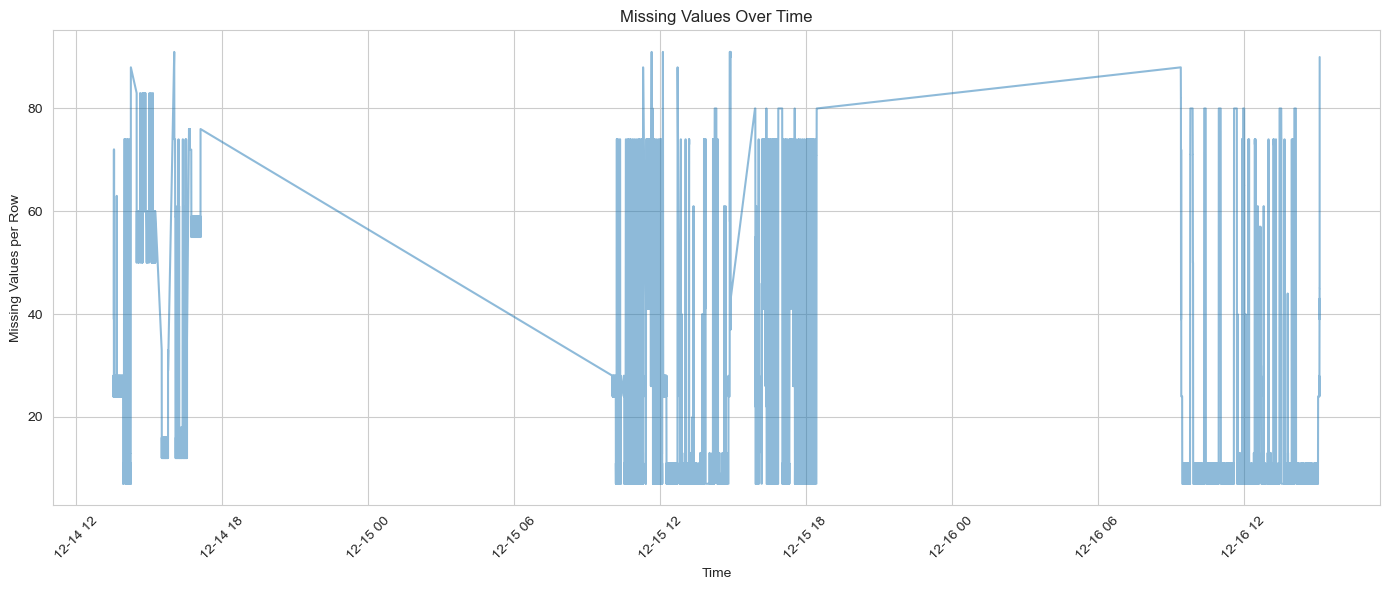

✓ Figure saved


In [18]:
exec(open('column_taxonomy.py').read())
# Identify your timestamp column from the taxonomy
timestamp_col = column_taxonomy['timestamp'][0]

# Convert to datetime
df[timestamp_col] = pd.to_datetime(df['timestamp'])

# Sort by time
df = df.sort_values(timestamp_col).reset_index(drop=True)

# Convert to datetime
df[timestamp_col] = pd.to_datetime(df['timestamp'])

print(f"Time range:")
print(f"  Start: {df[timestamp_col].min()}")
print(f"  End:   {df[timestamp_col].max()}")
print(f"  Duration: {df[timestamp_col].max() - df[timestamp_col].min()}")

# Check sampling rate
time_diffs = df[timestamp_col].diff().dropna()
print(f"\nSampling statistics:")
print(f"  Mean interval: {time_diffs.mean()}")
print(f"  Median interval: {time_diffs.median()}")
print(f"  Min interval: {time_diffs.min()}")
print(f"  Max interval: {time_diffs.max()}")

# Quick time series plot of missing values
missing_by_row = df.isnull().sum(axis=1)

plt.figure(figsize=(14, 6))
plt.plot(df[timestamp_col], missing_by_row, alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Missing Values per Row')
plt.title('Missing Values Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figure/missing_over_time.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure saved")

In [19]:
def analyze_missing_blocks(series, feature_name):
    """
    Analyze contiguous blocks of missing values
    """
    is_missing = series.isna().astype(int)
    
    # Find block lengths
    blocks = []
    current_block = 0
    
    for val in is_missing:
        if val == 1:  # Missing
            current_block += 1
        else:  # Not missing
            if current_block > 0:
                blocks.append(current_block)
            current_block = 0
    
    # Don't forget last block
    if current_block > 0:
        blocks.append(current_block)
    
    if len(blocks) == 0:
        return None
    
    return {
        'feature': feature_name,
        'num_blocks': len(blocks),
        'mean_block_length': np.mean(blocks),
        'median_block_length': np.median(blocks),
        'max_block_length': np.max(blocks),
        'min_block_length': np.min(blocks),
        'std_block_length': np.std(blocks),
        'total_missing': sum(blocks),
        'pct_missing': sum(blocks) / len(series) * 100
    }

# Get features to scale (the 50 features we'll impute)
features_to_analyze = []
for category in ['radio_metrics', 'network_qos', 'traffic_kpis', 'vehicle_telemetry']:
    features_to_analyze.extend(column_taxonomy[category])

# Analyze all 50 features
block_analysis = []
for col in features_to_analyze:
    if col in df.columns:
        result = analyze_missing_blocks(df[col], col)
        if result:
            block_analysis.append(result)

block_df = pd.DataFrame(block_analysis)
block_df = block_df.sort_values('mean_block_length', ascending=False)


print("MISSING BLOCK ANALYSIS")
print(block_df.to_string(index=False))

# Save results
block_df.to_csv('results/categorized_block_analysis.csv', index=False)


MISSING BLOCK ANALYSIS
                 feature  num_blocks  mean_block_length  median_block_length  max_block_length  min_block_length  std_block_length  total_missing  pct_missing
           throughput_DL          40         746.275000                 73.0             11647                 1       2274.361229          29851    56.111957
            cell_load_DL          40         746.275000                 73.0             11647                 1       2274.361229          29851    56.111957
               jitter_DL          40         746.275000                 73.0             11647                 1       2274.361229          29851    56.111957
               target_DL          40         746.275000                 73.0             11647                 1       2274.361229          29851    56.111957
               jitter_UL          48         698.729167                 47.5             10296                 1       2032.988510          33539    63.044418
            cell_load_U

In [20]:
def categorize_missingness_pattern(row):
    """Categorize features by their missingness pattern"""
    if row['mean_block_length'] < 5:
        return 'Sporadic (<5 consecutive)'
    elif row['mean_block_length'] < 50:
        return 'Medium Blocks (5-50)'
    elif row['mean_block_length'] < 500:
        return 'Large Blocks (50-500)'
    else:
        return 'Very Large Blocks (>500)'

block_df['pattern_type'] = block_df.apply(categorize_missingness_pattern, axis=1)

print("\n" + "="*80)
print("FEATURES BY MISSINGNESS PATTERN")
print("="*80)

for pattern in ['Sporadic (<5 consecutive)', 'Medium Blocks (5-50)', 
                'Large Blocks (50-500)', 'Very Large Blocks (>500)']:
    features = block_df[block_df['pattern_type'] == pattern]['feature'].tolist()
    if features:
        print(f"\n{pattern}: {len(features)} features")
        for feat in features:
            pct = block_df[block_df['feature'] == feat]['pct_missing'].values[0]
            mean_len = block_df[block_df['feature'] == feat]['mean_block_length'].values[0]
            print(f"  - {feat:40s} {pct:5.1f}% missing, avg block: {mean_len:6.1f}")

# Save results
block_df.to_csv('results\categorized_block_analysis.csv', index=False)
print("\n✓ Saved to results/categorized_block_analysis.csv")


FEATURES BY MISSINGNESS PATTERN

Medium Blocks (5-50): 4 features
  - ttl                                       31.4% missing, avg block:    5.6
  - icmp_seq                                  31.4% missing, avg block:    5.6
  - ping_ms                                   31.4% missing, avg block:    5.6
  - ping_size_bytes                           31.4% missing, avg block:    5.6

Large Blocks (50-500): 36 features
  - twist_linear_x                             8.3% missing, avg block:  276.2
  - orientation_w                              8.3% missing, avg block:  276.2
  - line_of_sight                              8.3% missing, avg block:  276.2
  - distance_to_bs                             8.3% missing, avg block:  276.2
  - twist_angular_z                            8.3% missing, avg block:  276.2
  - twist_angular_y                            8.3% missing, avg block:  276.2
  - position_x                                 8.3% missing, avg block:  276.2
  - position_y              

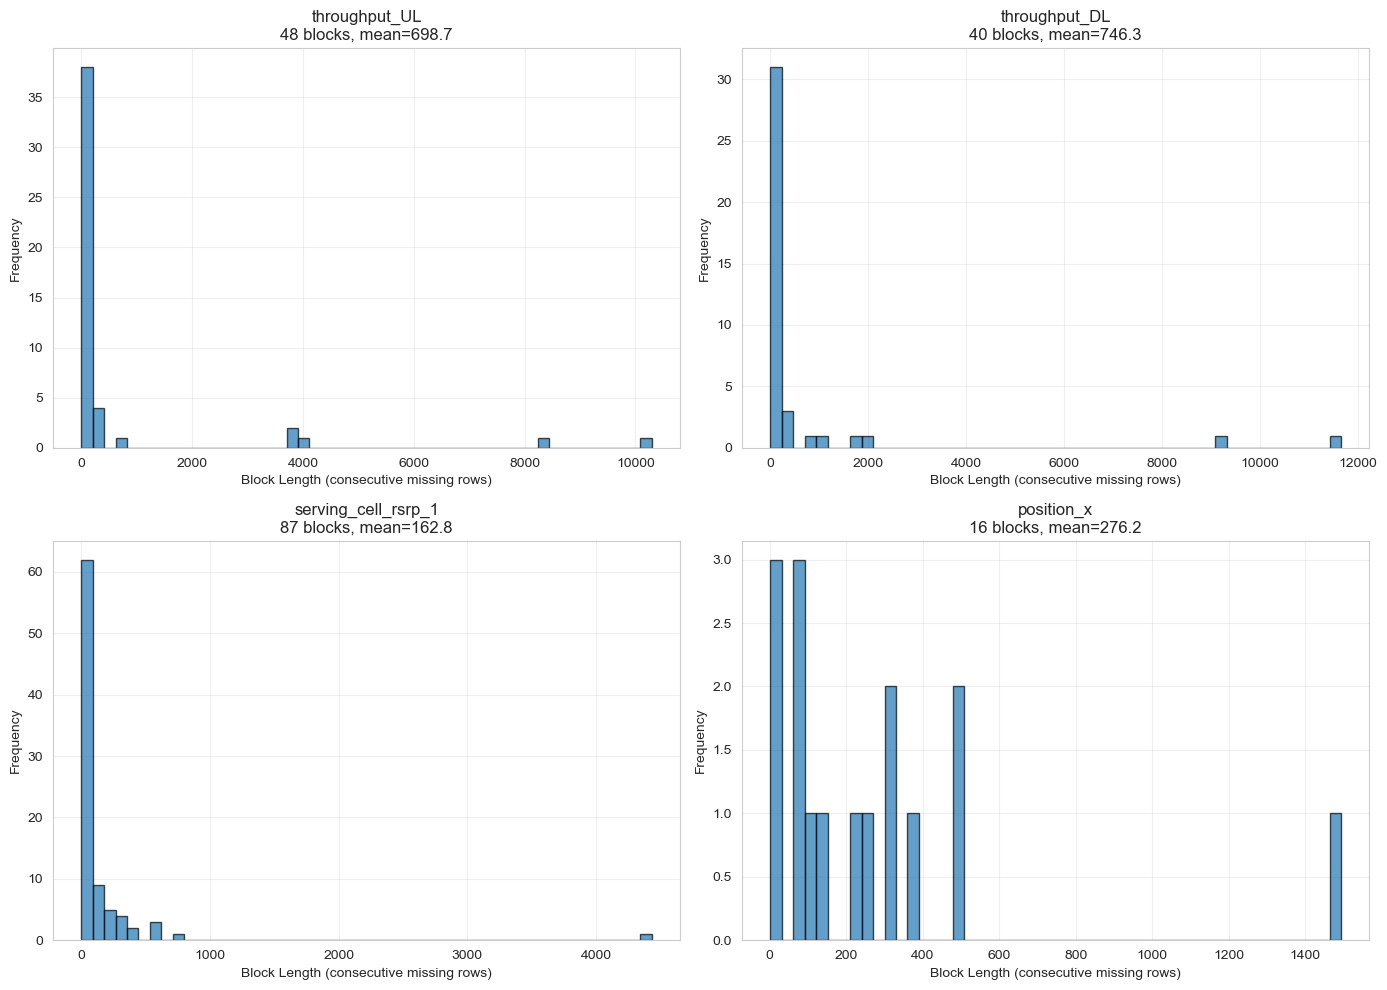

✓ Saved to figures/block_length_distributions.png


In [21]:
# Visualize block length distributions for key features

# Select a few representative features
sample_features = [
    'throughput_UL',      # High missing UL
    'throughput_DL',      # High missing DL  
    'serving_cell_rsrp_1', # Radio metric
    'position_x',          # Vehicle telemetry
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feat in enumerate(sample_features):
    if feat not in df.columns:
        continue
    
    # Get blocks for this feature
    is_missing = df[feat].isna().astype(int)
    blocks = []
    current_block = 0
    
    for val in is_missing:
        if val == 1:
            current_block += 1
        else:
            if current_block > 0:
                blocks.append(current_block)
            current_block = 0
    if current_block > 0:
        blocks.append(current_block)
    
    # Plot histogram
    ax = axes[idx]
    if blocks:
        ax.hist(blocks, bins=50, edgecolor='black', alpha=0.7)
        ax.set_xlabel('Block Length (consecutive missing rows)')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{feat}\n{len(blocks)} blocks, mean={np.mean(blocks):.1f}')
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'No missing values', ha='center', va='center')
        ax.set_title(feat)

plt.tight_layout()
plt.savefig('figure/block_length_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to figures/block_length_distributions.png")

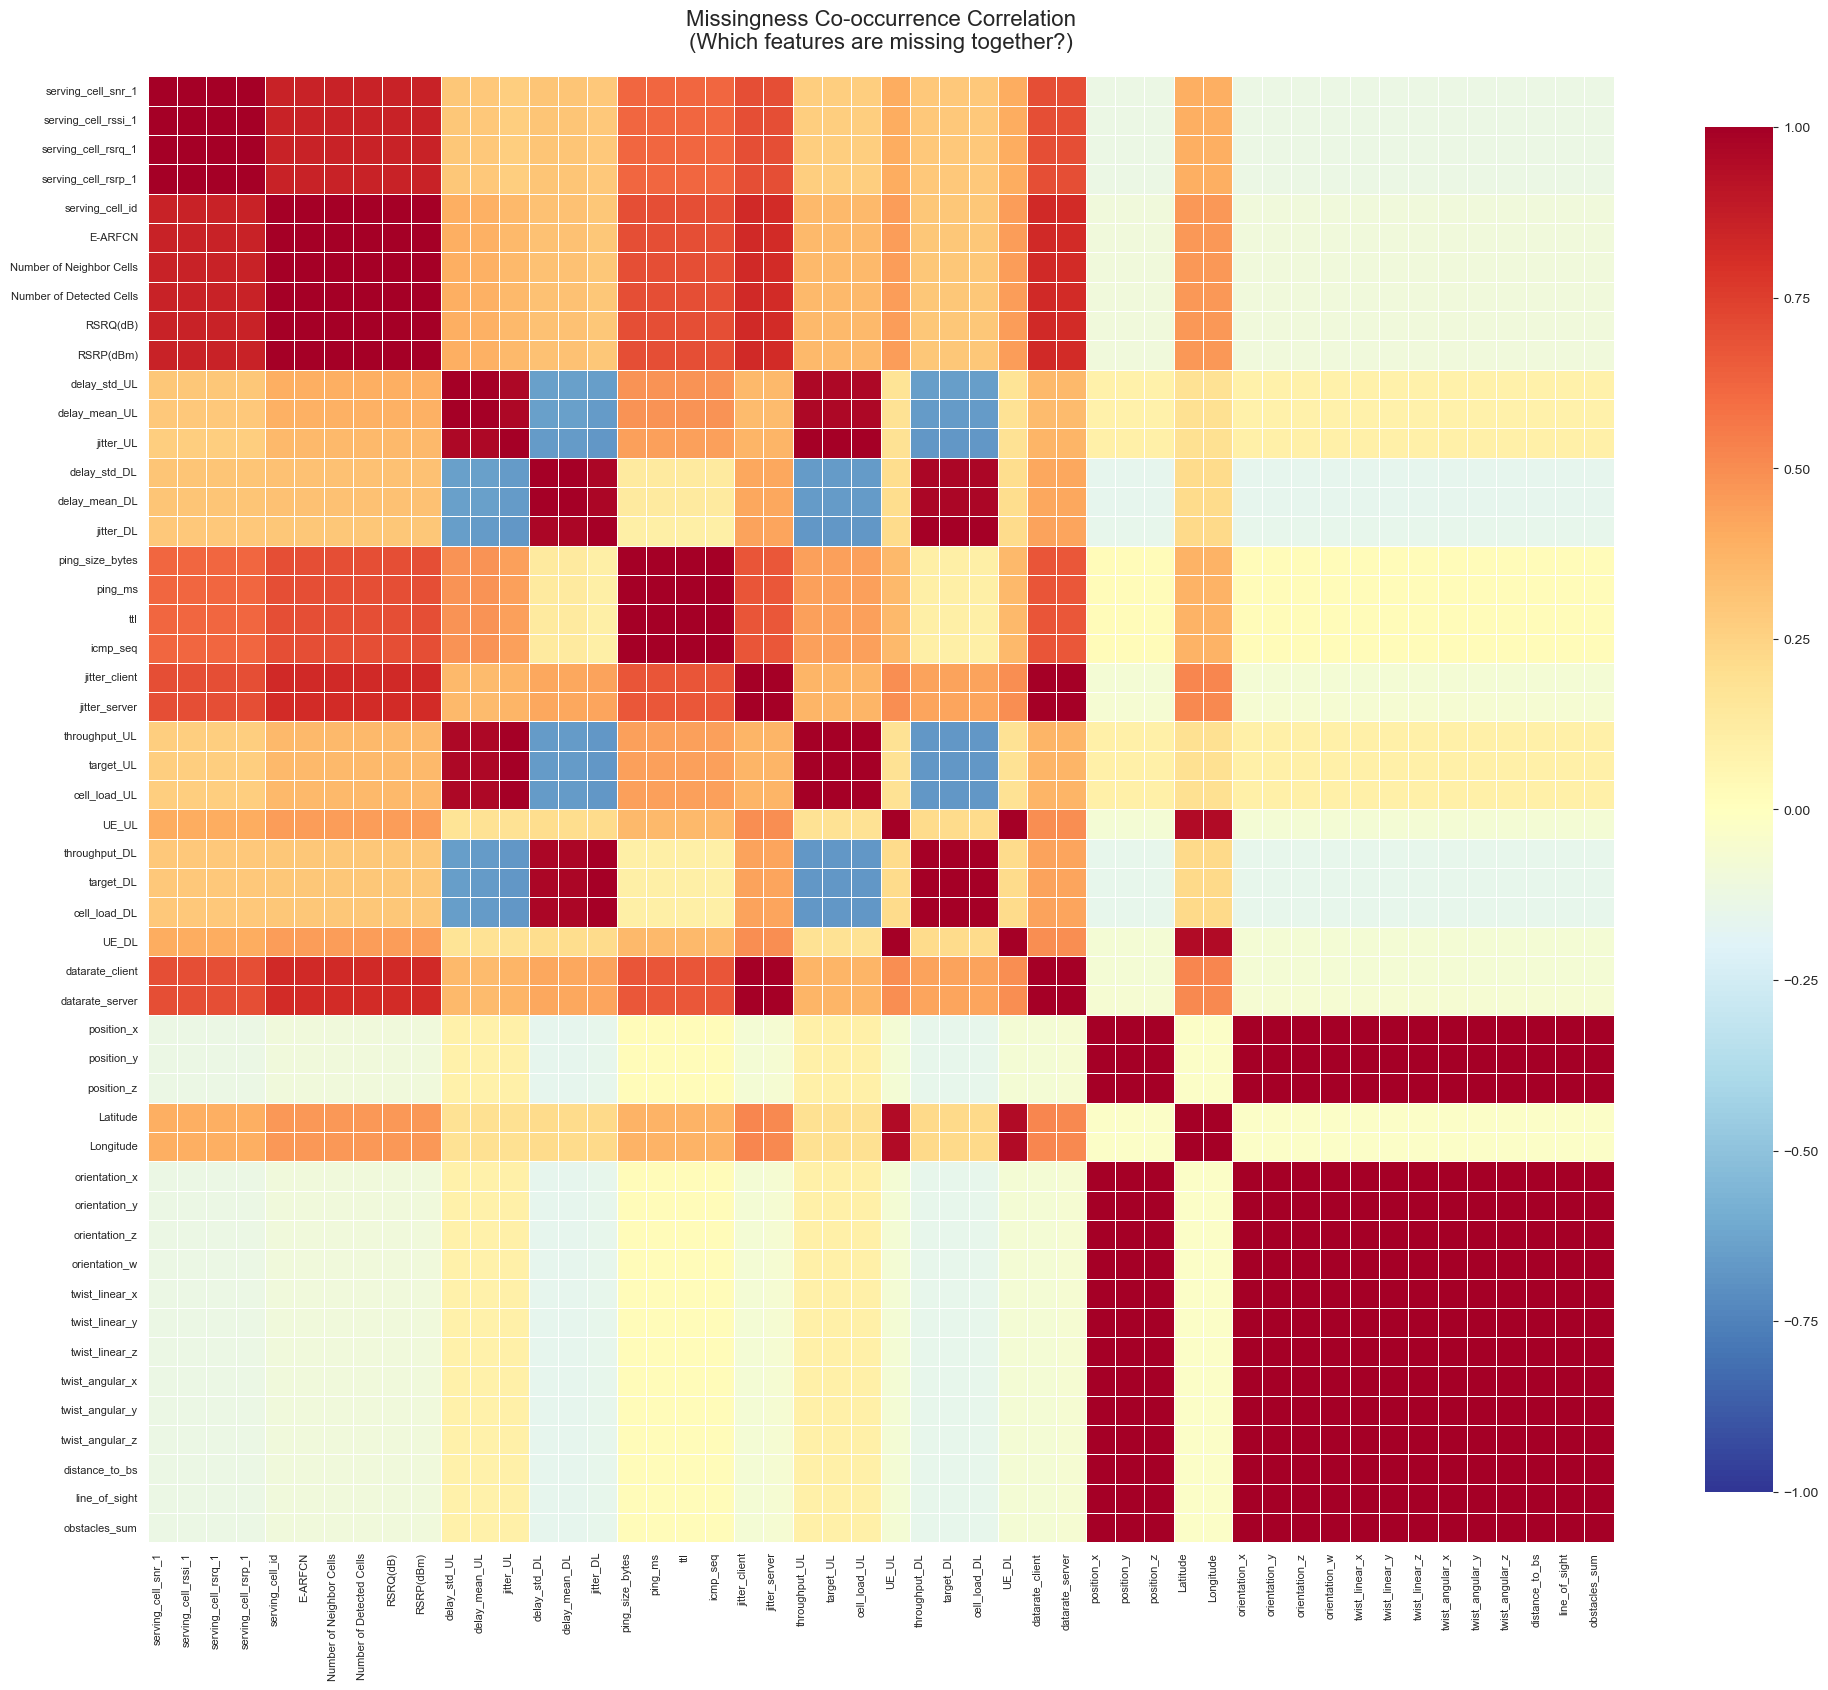

✓ Saved full heatmap

HIGHLY CORRELATED MISSINGNESS (>0.9)
                feature1                 feature2  correlation
      serving_cell_snr_1      serving_cell_rssi_1     1.000000
           orientation_y          twist_angular_z     1.000000
           orientation_x            line_of_sight     1.000000
           orientation_x            obstacles_sum     1.000000
           orientation_y            orientation_z     1.000000
           orientation_y            orientation_w     1.000000
           orientation_y           twist_linear_x     1.000000
           orientation_y           twist_linear_y     1.000000
           orientation_y           twist_linear_z     1.000000
           orientation_y          twist_angular_x     1.000000
           orientation_y          twist_angular_y     1.000000
           orientation_y           distance_to_bs     1.000000
           orientation_x          twist_angular_z     1.000000
           orientation_y            line_of_sight     1.000

In [22]:
# Create binary missing matrix (1 = missing, 0 = observed)
missing_matrix = df[features_to_analyze].isnull().astype(int)

# Compute correlation of missingness patterns
missing_corr = missing_matrix.corr()

# Visualize full correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(missing_corr, 
            cmap='RdYlBu_r', 
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            xticklabels=True,
            yticklabels=True)
plt.title('Missingness Co-occurrence Correlation\n(Which features are missing together?)', 
          fontsize=16, pad=20)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig('figure/missing_cooccurrence_full.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved full heatmap")

# Find highly correlated missingness (>0.9 = almost always missing together)
high_corr = []
for i in range(len(missing_corr.columns)):
    for j in range(i+1, len(missing_corr.columns)):
        corr_val = missing_corr.iloc[i, j]
        if corr_val > 0.9:
            high_corr.append({
                'feature1': missing_corr.columns[i],
                'feature2': missing_corr.columns[j],
                'correlation': corr_val
            })

if high_corr:
    print("\n" + "="*80)
    print("HIGHLY CORRELATED MISSINGNESS (>0.9)")
    print("="*80)
    high_corr_df = pd.DataFrame(high_corr).sort_values('correlation', ascending=False)
    print(high_corr_df.to_string(index=False))
    
    # Save
    high_corr_df.to_csv('results\high_missingness_correlation.csv', index=False)
    print("\n✓ Saved to results/high_missingness_correlation.csv")

Time range: 2021-12-14 13:30:49+01:00 to 2021-12-16 15:07:53+01:00
Duration: 2 days 01:37:04


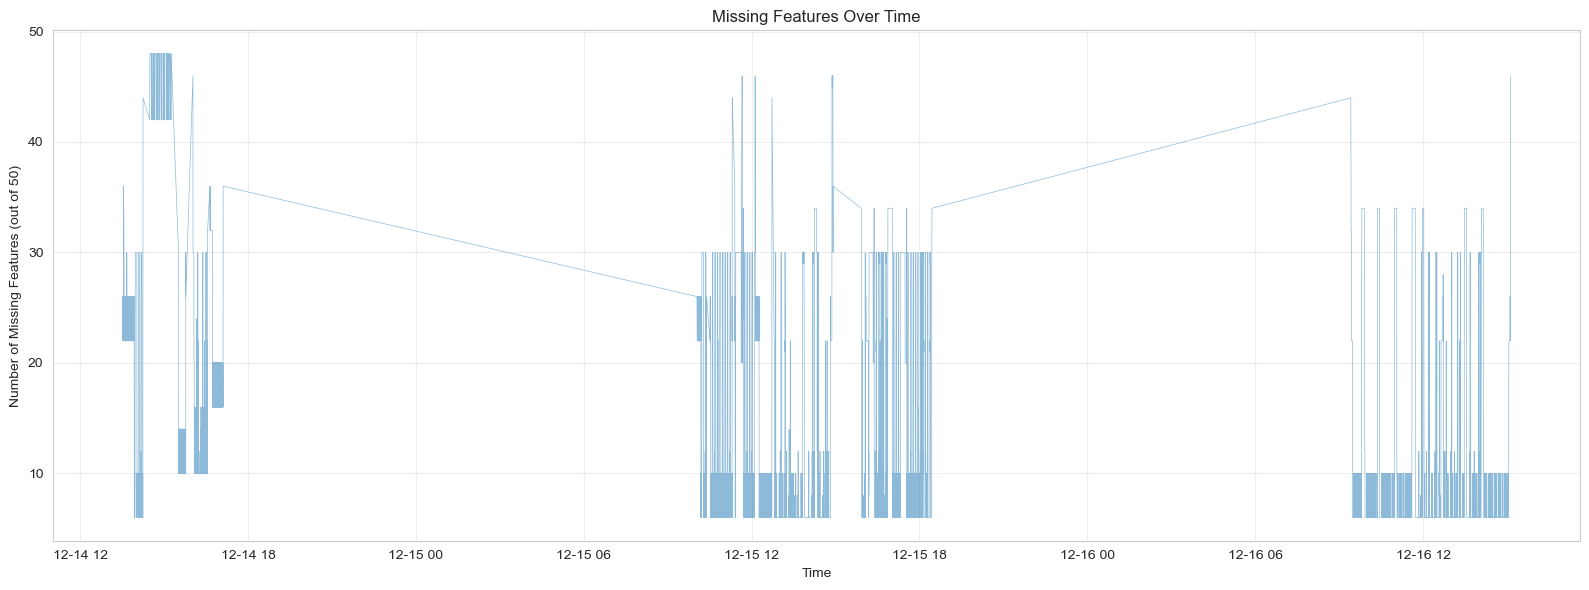

✓ Saved temporal pattern


In [23]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by time
df = df.sort_values('timestamp').reset_index(drop=True)

print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Duration: {df['timestamp'].max() - df['timestamp'].min()}")

# Missing values over time (per row)
missing_per_row = df[features_to_analyze].isnull().sum(axis=1)

plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'], missing_per_row, alpha=0.5, linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Number of Missing Features (out of 50)')
plt.title('Missing Features Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figure/missing_over_time.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved temporal pattern")


MISSING DATA BY CATEGORY

RADIO METRICS:
  Features: 10
  Average missing: 24.01%
  Total missing values: 127,748

NETWORK QOS:
  Features: 12
  Average missing: 43.87%
  Total missing values: 280,050

TRAFFIC KPIS:
  Features: 10
  Average missing: 40.69%
  Total missing values: 216,490

VEHICLE TELEMETRY:
  Features: 18
  Average missing: 8.06%
  Total missing values: 77,212


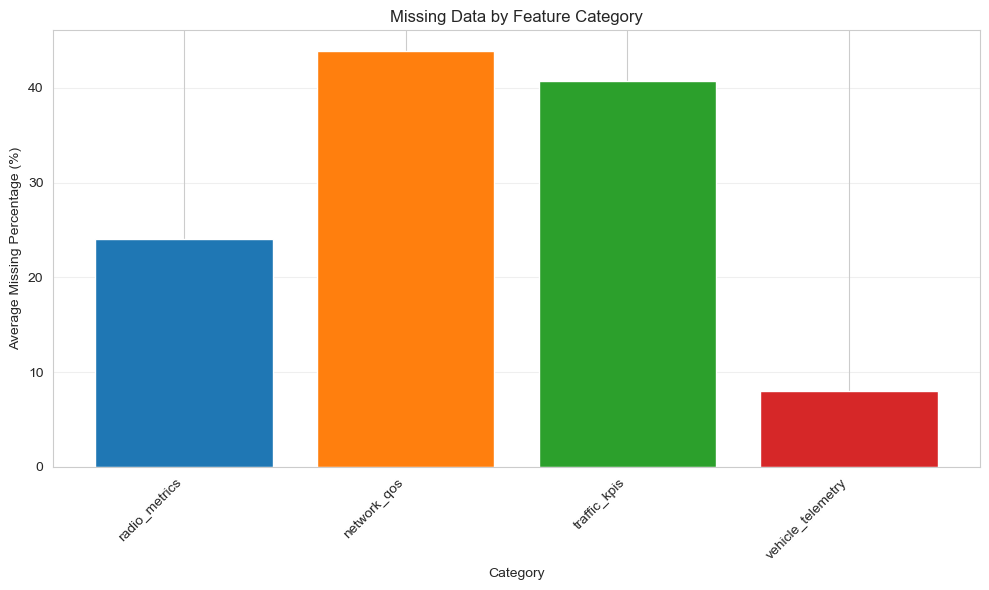


✓ Saved category comparison


In [24]:
# Analyze by category
category_missing = {}

for category in ['radio_metrics', 'network_qos', 'traffic_kpis', 'vehicle_telemetry']:
    cols = column_taxonomy[category]
    cols_in_df = [c for c in cols if c in df.columns]
    
    if cols_in_df:
        category_missing[category] = {
            'num_features': len(cols_in_df),
            'mean_pct_missing': df[cols_in_df].isnull().mean().mean() * 100,
            'total_missing': df[cols_in_df].isnull().sum().sum(),
            'features': cols_in_df
        }

print("\n" + "="*80)
print("MISSING DATA BY CATEGORY")
print("="*80)

for cat, stats in category_missing.items():
    print(f"\n{cat.upper().replace('_', ' ')}:")
    print(f"  Features: {stats['num_features']}")
    print(f"  Average missing: {stats['mean_pct_missing']:.2f}%")
    print(f"  Total missing values: {stats['total_missing']:,}")

# Visualize
categories = list(category_missing.keys())
avg_missing = [category_missing[cat]['mean_pct_missing'] for cat in categories]

plt.figure(figsize=(10, 6))
plt.bar(categories, avg_missing, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Average Missing Percentage (%)')
plt.xlabel('Category')
plt.title('Missing Data by Feature Category')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('figure/missing_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Saved category comparison")

In [25]:
# Create comprehensive summary
summary = f"""


DATASET INFO
------------
Rows: {len(df):,}
Features analyzed: {len(features_to_analyze)}
Total missing values: {df[features_to_analyze].isnull().sum().sum():,}
Overall missing percentage: {df[features_to_analyze].isnull().sum().sum() / df[features_to_analyze].size * 100:.2f}%

BLOCK STRUCTURE
---------------
Features with sporadic missing (<5): {len(block_df[block_df['pattern_type'] == 'Sporadic (<5 consecutive)'])}
Features with medium blocks (5-50): {len(block_df[block_df['pattern_type'] == 'Medium Blocks (5-50)'])}
Features with large blocks (50-500): {len(block_df[block_df['pattern_type'] == 'Large Blocks (50-500)'])}
Features with very large blocks (>500): {len(block_df[block_df['pattern_type'] == 'Very Large Blocks (>500)'])}

Longest average block: {block_df.iloc[0]['feature']} ({block_df.iloc[0]['mean_block_length']:.1f} rows)
Most blocks: {block_df.sort_values('num_blocks', ascending=False).iloc[0]['feature']} ({block_df.sort_values('num_blocks', ascending=False).iloc[0]['num_blocks']} blocks)

CO-OCCURRENCE
-------------
Number of feature pairs missing together (>0.9 correlation): {len(high_corr) if high_corr else 0}

CATEGORY BREAKDOWN
------------------
"""

for cat, stats in category_missing.items():
    summary += f"{cat:25s}: {stats['mean_pct_missing']:5.1f}% missing (avg)\n"



print(summary)




DATASET INFO
------------
Rows: 53,199
Features analyzed: 50
Total missing values: 701,500
Overall missing percentage: 26.37%

BLOCK STRUCTURE
---------------
Features with sporadic missing (<5): 0
Features with medium blocks (5-50): 4
Features with large blocks (50-500): 36
Features with very large blocks (>500): 10

Longest average block: throughput_DL (746.3 rows)
Most blocks: ping_size_bytes (2974 blocks)

CO-OCCURRENCE
-------------
Number of feature pairs missing together (>0.9 correlation): 189

CATEGORY BREAKDOWN
------------------
radio_metrics            :  24.0% missing (avg)
network_qos              :  43.9% missing (avg)
traffic_kpis             :  40.7% missing (avg)
vehicle_telemetry        :   8.1% missing (avg)

